In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pandas as pd

In [2]:
df = pd.read_csv("../Datos tratados/Datos_con_ECFP.csv")

In [4]:
X = df.drop(columns=["MorganFP", "SMILES","BBB+/BBB-", "group"])
y = df["BBB+/BBB-"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
pipe = Pipeline([
    ('pca', PCA()),
    ('LR', LogisticRegression())
])

In [20]:
param_grid = {
    'pca__n_components': [314],  # Ejemplo de opciones para el número de componentes en PCA
    'LR__C': [0.01, 0.1, 1, 10],
    'LR__solver': ['liblinear', 'saga']
}

In [21]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [22]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END LR__C=0.01, LR__solver=liblinear, pca__n_components=314; total time=   3.1s
[CV] END LR__C=0.01, LR__solver=liblinear, pca__n_components=314; total time=   3.2s
[CV] END LR__C=0.01, LR__solver=liblinear, pca__n_components=314; total time=   2.4s
[CV] END LR__C=0.01, LR__solver=liblinear, pca__n_components=314; total time=   2.8s
[CV] END LR__C=0.01, LR__solver=liblinear, pca__n_components=314; total time=   3.2s
[CV] END .LR__C=0.01, LR__solver=saga, pca__n_components=314; total time=   1.9s
[CV] END .LR__C=0.01, LR__solver=saga, pca__n_components=314; total time=   2.0s
[CV] END .LR__C=0.01, LR__solver=saga, pca__n_components=314; total time=   2.5s
[CV] END .LR__C=0.01, LR__solver=saga, pca__n_components=314; total time=   2.2s
[CV] END .LR__C=0.01, LR__solver=saga, pca__n_components=314; total time=   2.5s
[CV] END LR__C=0.1, LR__solver=liblinear, pca__n_components=314; total time=   2.3s
[CV] END LR__C=0.1, LR__so

c:\Users\Eliud\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...LR__C=10, LR__solver=saga, pca__n_components=314; total time=   3.7s
[CV] END ...LR__C=10, LR__solver=saga, pca__n_components=314; total time=   3.6s
[CV] END ...LR__C=10, LR__solver=saga, pca__n_components=314; total time=   3.8s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('LR', LogisticRegression())]),
             param_grid={'LR__C': [0.01, 0.1, 1, 10],
                         'LR__solver': ['liblinear', 'saga'],
                         'pca__n_components': [314]},
             scoring='accuracy', verbose=2)

In [23]:
grid_search.best_params_

{'LR__C': 1, 'LR__solver': 'liblinear', 'pca__n_components': 314}

In [24]:
grid_search.best_score_

0.8454763811048839

# Entrenamiento con los datos de prueba
<hr>

In [26]:
pipe = Pipeline([
    ('pca', PCA(n_components=314)),
    ('svc', LogisticRegression(C=1, solver="liblinear"))
])

In [27]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=314)),
                ('svc', LogisticRegression(C=1, solver='liblinear'))])

# Resultados del modelo
<hr>

In [28]:
y_predicha = pipe.predict(X_test)

In [29]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.837
Recall 0.837
precision 0.836
f1 0.836


In [30]:
y_entrenamiento = pipe.predict(X_train)

In [31]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.874
Recall 0.874
precision 1.0
f1 0.873


# Confusion Matrix
<hr>

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [33]:
mat = confusion_matrix(y_predicha, y_test)

<Axes: >

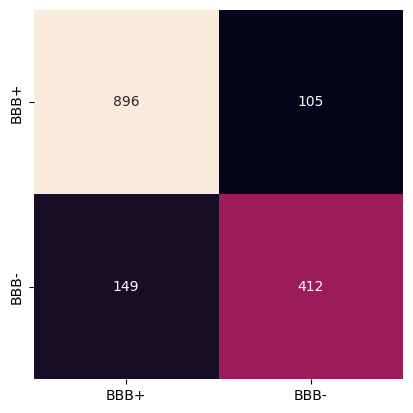

In [34]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar = False, xticklabels=df["BBB+/BBB-"].value_counts().index, yticklabels=df["BBB+/BBB-"].value_counts().index)

# Guardar modelo
<hr>

In [36]:
import joblib

In [37]:
joblib.dump(pipe, '../Guardado de modelos/modelo_LR.joblib')

['../Guardado de modelos/modelo_LR.joblib']